In [1]:
# import necessary packages
import re
import numpy as np
import pandas as pd
import nltk
import plotly
import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
          
plotly.offline.init_notebook_mode() 
import cufflinks as cf
cf.go_offline()
cf.getThemes()
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [2]:
import zipfile
zip_file_path = '../mridul/data/gun-violence-data_01-2013_03-2018.zip'
unzip_folder_path = 'data/'  # specify the folder where you want to extract the files

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(unzip_folder_path)

# Read the CSV file into a dataframe
csv_file_path = '../mridul/data/gun-violence-data_01-2013_03-2018.csv'
gun_df = pd.read_csv(csv_file_path)

In [4]:
# Check for any missing values in the dataframe
gun_df.isnull().sum()

incident_id                         0
date                                0
state                               0
city_or_county                      0
address                         16497
n_killed                            0
n_injured                           0
incident_url                        0
source_url                        468
incident_url_fields_missing         0
congressional_district          11944
gun_stolen                      99498
gun_type                        99451
incident_characteristics          326
latitude                         7923
location_description           197588
longitude                        7923
n_guns_involved                 99451
notes                           81017
participant_age                 92298
participant_age_group           42119
participant_gender              36362
participant_name               122253
participant_relationship       223903
participant_status              27626
participant_type                24863
sources     

Questions to consider when exploring dataset: (2013 - 2018)

>- Which state has maximum no. of gun shooting incidents ( based on the state name appearing in the count)
>- Which city/county has maximum no. of gun shooting incidents ( based on the city name appearing in the count)
>- How many people have been killed and injured in these shooting incidents from 2013 - 2018
>- How many incidents involve cases of stolen guns and how many guns were stolen
>- Which type of gun is most popular for these incidents
>- Age group of participants those died or injured
>- Gender of participants those died or injured or killed or arrested or unharmed
>- How many of the participants were arrested ( means they were shot in the police encounter)
>- How many participants those died or got injured were suspects or victims
>- Which year from 2013-2015 had maximum no. of incidents
>- How many got killed from a particular state and county

### 1 - Which state has maximum no. of gun shooting incidents ( based on the state name appearing in the count)

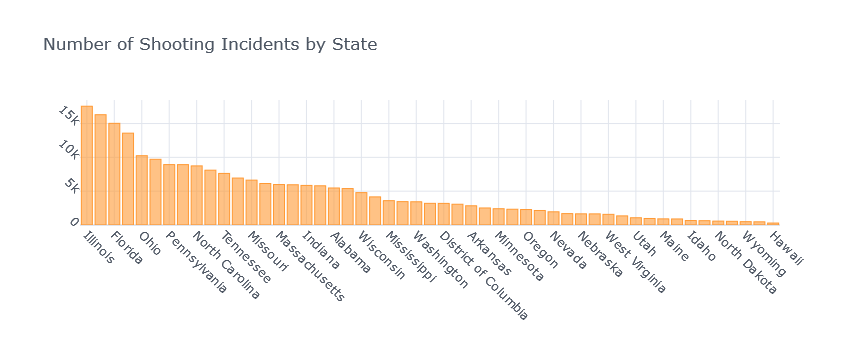

In [95]:
# df_Gun.groupby(['state']).count() # another method to perform this operation
gun_df['state'].value_counts().iplot(kind = 'bar', theme = 'white', tickangle=45, title = 'Number of Shooting Incidents by State')

### 2 - Which city/county has maximum no. of gun shooting incidents ( based on the city name appearing in the count)

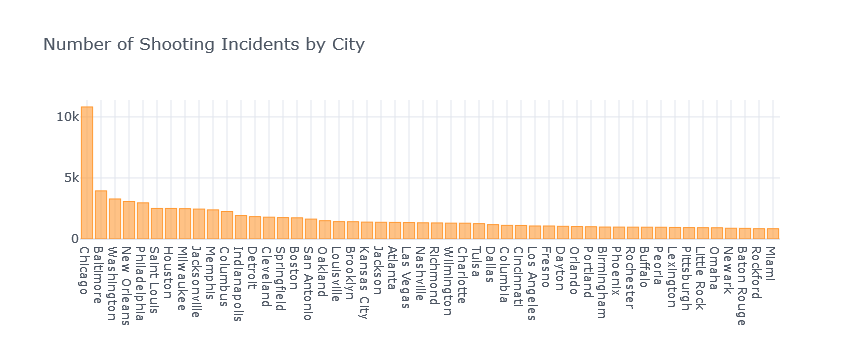

In [99]:
gun_df['city_or_county'].value_counts().head(50).iplot(kind = 'bar', theme = 'white', title = 'Number of Shooting Incidents by City')

In [12]:
# 3- How many people have been killed and injured in these shooting incidents from 2013 - 2018
gun_df['Total_Killed/Injured']= gun_df['n_killed'] + gun_df['n_injured'] # creating a new column and adding the killed plus
                                                                       # injured people into it
print('Total Killed & Injured:',gun_df['Total_Killed/Injured'].sum()) # Total killed + injured
print('Total Killed:',gun_df['n_killed'].sum()) # Total killed
print('Total Injured:',gun_df['n_injured'].sum()) # Total injured

Total Killed & Injured: 178870
Total Killed: 60468
Total Injured: 118402


In [14]:
# 6- Age group of participants those died or injured
gun_df['participant_age_group'] = gun_df['participant_age_group'].fillna('Null')
gun_df['participant_age_group'] = gun_df['participant_age_group'].fillna('Null')
gun_df['participant_age_group'] = gun_df['participant_age_group'].str.replace('::',',')
gun_df['participant_age_group'] = gun_df['participant_age_group'].str.replace('|',' ')
gun_df['participant_age_group'] = gun_df['participant_age_group'].str.replace(',',' ')
gun_df['participant_age_group'] = gun_df['participant_age_group'].str.replace('\d+', '')
age_list = gun_df['participant_age_group'].tolist()   

final_list_age = []
for i in age_list:
    final_list_age.append(i.split())

count = 0
for i in final_list_age:
    for k in i:
        if ('Adult'==k):
            count = count+1
            
print('Number of Adults:',count)

count = 0
for i in final_list_age:
    for k in i:
        if ('Teen'==k):
            count = count+1
            
print('Number of Teens:',count)

count = 0
for i in final_list_age:
    for k in i:
        if ('Child'==k):
            count = count+1
            
print('Number of children:',count)


Number of Adults: 300616
Number of Teens: 25193
Number of children: 4472


In [17]:
# 7- Gender of participants those died or injured
gun_df['participant_gender'] = gun_df['participant_gender'].fillna('Null')
gun_df['participant_gender'] = gun_df['participant_gender'].str.replace('::',',')
gun_df['participant_gender'] = gun_df['participant_gender'].str.replace('|',' ')
gun_df['participant_gender'] = gun_df['participant_gender'].str.replace(',',' ')
gun_df['participant_gender'] = gun_df['participant_gender'].str.replace('\d+', '')
genderlist = gun_df['participant_gender'].tolist()   

final_list_gender=[]
for i in genderlist:
    final_list_gender.append(i.split())

count=0
for i in final_list_gender:
    for k in i:
        if ('Male'==k):
            count = count+1
            
print('Male Count:',count)

count=0
for i in final_list_gender:
    for k in i:
        if ('Female'==k):
            count = count+1
            
print('Female Count:',count)

Male Count: 304103
Female Count: 42376


In [18]:
# 8- How many of the participants were arrested ( means they were shot in the police encounter)
gun_df['participant_status'] = gun_df['participant_status'].fillna('Null')
gun_df['participant_status'] = gun_df['participant_status'].str.replace('::',',')
gun_df['participant_status'] = gun_df['participant_status'].str.replace('|',' ')
gun_df['participant_status'] = gun_df['participant_status'].str.replace(',',' ')
gun_df['participant_status']= gun_df['participant_status'].str.replace('\d+', '')
status_list = gun_df['participant_status'].tolist()   

final_list_status=[]
for i in status_list:
    final_list_status.append(i.split())

count=0
for i in final_list_status:
    for k in i:
        if ('Killed'==k):
            count = count+1
            
print('Number of Killed:',count)

count=0
for i in final_list_status:
    for k in i:
        if ('Injured'==k):
            count = count+1
            
print('Number of Injured:',count)

count=0
for i in final_list_status:
    for k in i:
        if ('Arrested'==k):
            count = count+1
            
print('Number of Arrested:',count)

count=0
for i in final_list_status:
    for k in i:
        if ('Unharmed'==k):
            count = count+1
            
print('Number of Unharmed:',count)


Number of Killed: 59482
Number of Injured: 116862
Number of Arrested: 99326
Number of Unharmed: 186298


In [19]:
# 9- How many participants those died or got injured were suspects or victims
gun_df['participant_type'] = gun_df['participant_type'].fillna('Null')
gun_df['participant_type'] = gun_df['participant_type'].str.replace('::',',')
gun_df['participant_type'] = gun_df['participant_type'].str.replace('|',' ')
gun_df['participant_type'] = gun_df['participant_type'].str.replace(',',' ')
gun_df['participant_type'] = gun_df['participant_type'].str.replace('\d+', '')
type_list = gun_df['participant_type'].tolist()   

final_list_type =[]
for i in type_list:
    final_list_type.append(i.split())

count=0
for i in final_list_type:
    for k in i:
        if ('Victim'==k):
            count = count+1
            
print('Number of Victim Casualties:',count)

count=0
for i in final_list_type:
    for k in i:
        if ('Subject-Suspect'==k):
            count = count+1
            
print('Number of Suspect Casualties:',count)

Number of Victim Casualties: 189600
Number of Suspect Casualties: 195913


In [20]:
# 10- Which year from 2013-2015 had maximum no. of incidents
gun_df['date'] = gun_df['date'].fillna('Null')
gun_df['date'] = gun_df['date'].str.replace('/',' ')
date_list = gun_df['date'].tolist()   

final_list_date=[]
for i in date_list:
    final_list_date.append(i.split())
final_list_date

count_2013=0
count_2014=0
count_2015=0
count_2016=0
count_2017=0
count_2018=0
for i in final_list_date:
    for k in i:
        if ('2013'==k):
            count_2013 = count_2013+1
        elif ('2014'==k):
            count_2014 = count_2014+1
        elif ('2015'==k):
            count_2015 = count_2015+1
        elif ('2016'==k):
            count_2016 = count_2016+1
        elif ('2017'==k):
            count_2017 = count_2017+1
        elif ('2018'==k):
            count_2018 = count_2018+1
            
print('Number of incidents in 2013:', count_2013)
print('Number of incidents in 2014:', count_2014)
print('Number of incidents in 2015:', count_2015)
print('Number of incidents in 2016:', count_2016)
print('Number of incidents in 2017:', count_2017)
print('Number of incidents in 2018:', count_2018)


Number of incidents in 2013: 278
Number of incidents in 2014: 51854
Number of incidents in 2015: 53579
Number of incidents in 2016: 58763
Number of incidents in 2017: 61401
Number of incidents in 2018: 13802


In [22]:
# 11- How many got killed from a particular state and county/city
state_killed = gun_df[['state', 'n_killed']].groupby(['state'], 
                                   as_index=False).sum().sort_values(by='n_killed', ascending=False).head(20)

In [23]:
state_killed

state  n_killed
4       California      5562
43           Texas      5046
9          Florida      3909
13        Illinois      3409
35            Ohio      2508
10         Georgia      2456
38    Pennsylvania      2395
33  North Carolina      2225
18       Louisiana      2179
25        Missouri      2136
0          Alabama      1880
42       Tennessee      1824
32        New York      1705
20        Maryland      1691
40  South Carolina      1610
14         Indiana      1608
22        Michigan      1588
46        Virginia      1459
24     Mississippi      1176
30      New Jersey      1168

In [24]:
city_killed = gun_df[['city_or_county','n_killed']].groupby(['city_or_county'],as_index=False).sum().sort_values(by='n_killed'
                                    ,ascending=False).head(20)
city_killed

city_or_county  n_killed
2019         Chicago      2104
5303         Houston      1145
530        Baltimore      1055
10152    Saint Louis       919
9018    Philadelphia       901
8060     New Orleans       703
6622     Los Angeles       636
7258         Memphis       623
5460    Indianapolis       616
3043         Detroit       604
6229       Las Vegas       601
5728     Kansas City       565
2435        Columbus       564
10295    San Antonio       516
2254       Cleveland       506
7465       Milwaukee       486
2807          Dallas       477
12154     Washington       468
5565    Jacksonville       467
9029         Phoenix       412

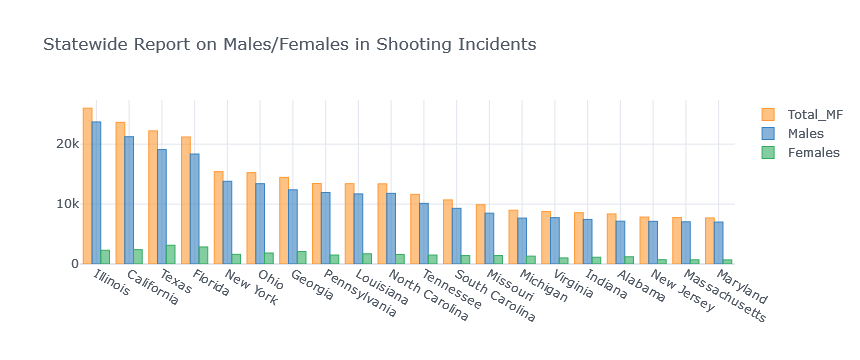

In [89]:
#12 - How many males and females were involved in these incidents for every state
gun_df['Males'] = gun_df['participant_gender'].apply(lambda x: x.count('Male'))   
gun_df['Females'] = gun_df['participant_gender'].apply(lambda x: x.count('Female'))
gun_df['Total_MF'] = gun_df['Males'] + gun_df['Females']
state_MF = gun_df[['state','Total_MF','Males','Females']].groupby(['state'],as_index=False).sum().sort_values(by='Total_MF',
                                                                                                           ascending=False)

state_MF.head(20)[['state','Total_MF','Males','Females']].set_index('state').iplot(kind='bar', theme = 'white',
                                        title = 'Statewide Report on Males/Females in Shooting Incidents')

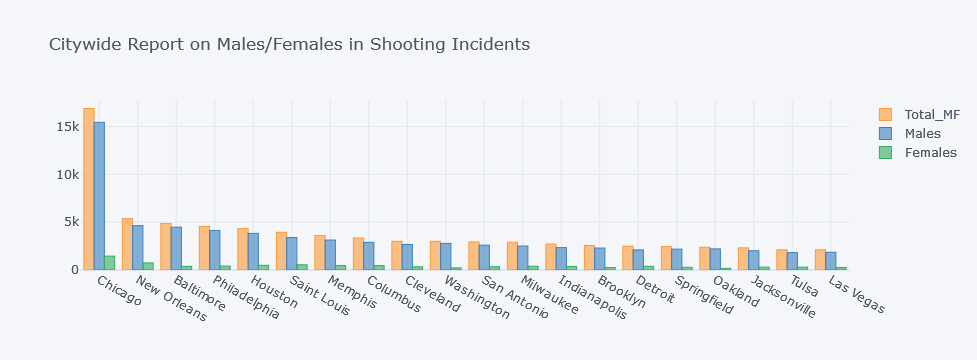

In [26]:
#12 - How many males and females were involved in these incidents for every city/county
city_MF = gun_df[['city_or_county','Total_MF','Males','Females']].groupby(['city_or_county'],
                                        as_index=False).sum().sort_values(by='Total_MF',ascending=False)

city_MF.head(20)[['city_or_county','Total_MF','Males','Females']].set_index('city_or_county').iplot(kind='bar',
                                    title = 'Citywide Report on Males/Females in Shooting Incidents')

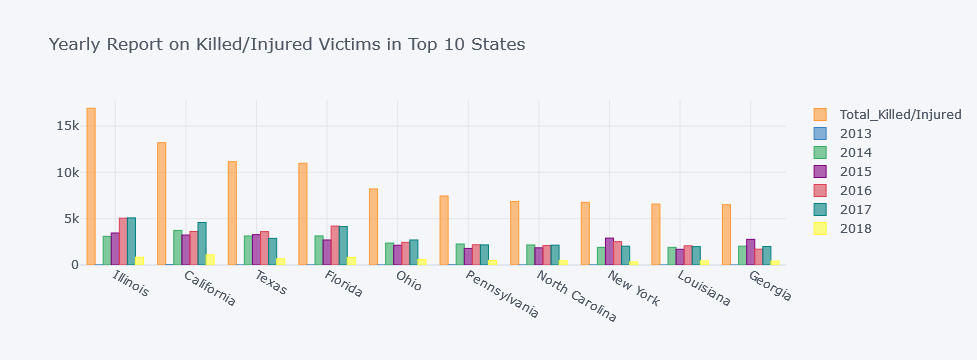

In [27]:
#13 - How many incidents 
gun_df['2013'] = gun_df['date'].apply(lambda x: x.count('2013'))
gun_df['2014'] = gun_df['date'].apply(lambda x: x.count('2014'))
gun_df['2015'] = gun_df['date'].apply(lambda x: x.count('2015'))
gun_df['2016'] = gun_df['date'].apply(lambda x: x.count('2016'))
gun_df['2017'] = gun_df['date'].apply(lambda x: x.count('2017'))
gun_df['2018'] = gun_df['date'].apply(lambda x: x.count('2018'))

state_year_incidents = gun_df[['state','Total_Killed/Injured','2013','2014','2015','2016','2017','2018']].groupby(['state'],as_index = False).sum().sort_values(by='Total_Killed/Injured',ascending=False)

state_year_incidents.head(10)[['state','Total_Killed/Injured','2013','2014','2015','2016','2017','2018']].set_index('state').iplot(kind = 'bar',
                                                                        title = 'Yearly Report on Killed/Injured Victims in Top 10 States')



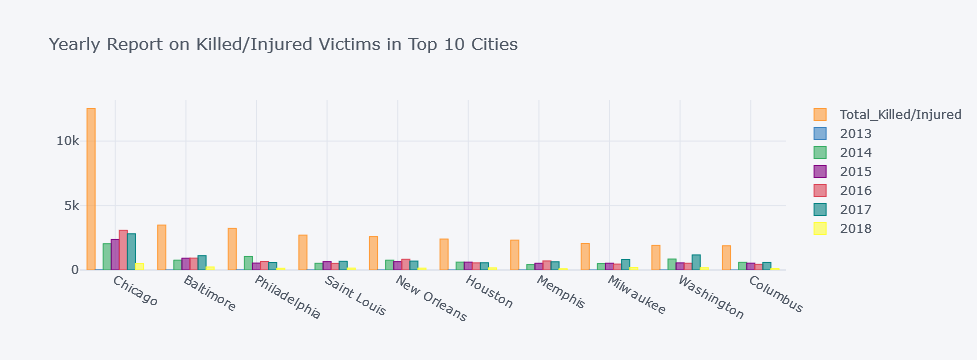

In [28]:
city_year_incidents = gun_df[['city_or_county','Total_Killed/Injured','2013','2014','2015','2016','2017','2018']].groupby(['city_or_county'],as_index = False).sum().sort_values(by='Total_Killed/Injured',ascending=False)

city_year_incidents.head(10)[['city_or_county','Total_Killed/Injured','2013','2014','2015','2016','2017','2018']].set_index('city_or_county').iplot(kind = 'bar',
                                                                        title = 'Yearly Report on Killed/Injured Victims in Top 10 Cities')



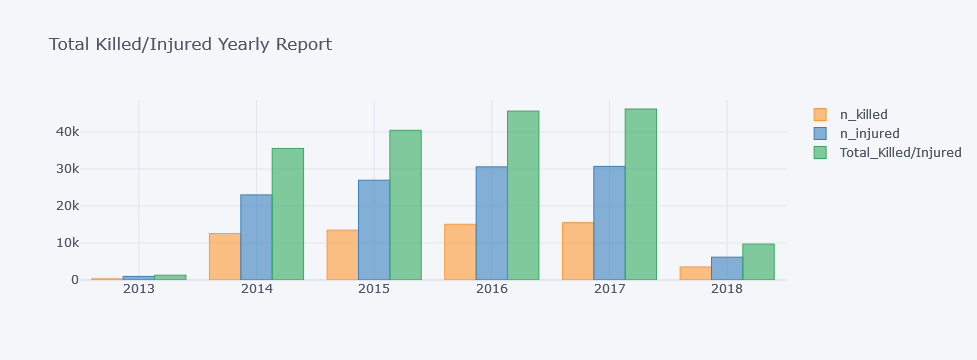

In [29]:
yearlist = []
years = ['2013','2014','2015','2016','2017','2018']
for i in final_list_date:
    for k in i:
        
        if k in years:
            yearlist.append(k)

# No. of persons killed, injured by year
gun_df['Year'] = yearlist

incidents_year = gun_df[['Year','n_killed','n_injured','Total_Killed/Injured']].groupby(['Year'], as_index = False).sum().sort_values(by='Year',
ascending = True)

incidents_year[['Year','n_killed','n_injured','Total_Killed/Injured']].set_index('Year').iplot(kind = 'bar',
                                         title = 'Total Killed/Injured Yearly Report')

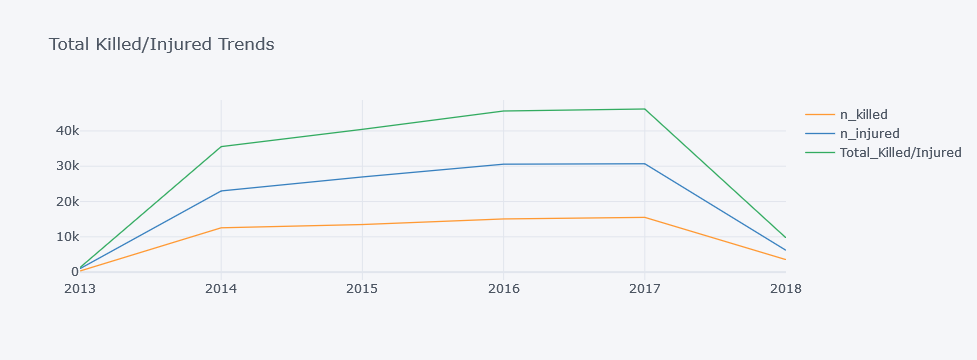

In [30]:
incidents_year[['Year','n_killed','n_injured','Total_Killed/Injured']].set_index('Year').iplot(kind = 'scatter',
                            title = 'Total Killed/Injured Trends')

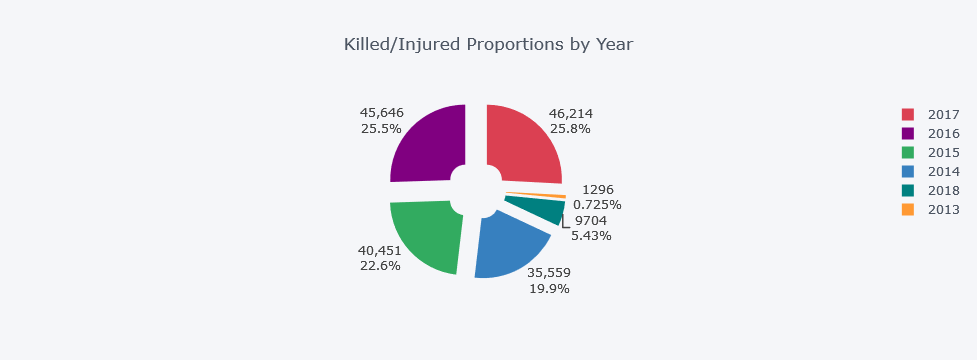

In [32]:
incidents_year[['Year','Total_Killed/Injured']].iplot(kind='pie',labels='Year',values='Total_Killed/Injured',
                                    pull=.2,hole=0.2,textposition='outside',textinfo='value+percent',
                                                      title='Killed/Injured Proportions by Year')

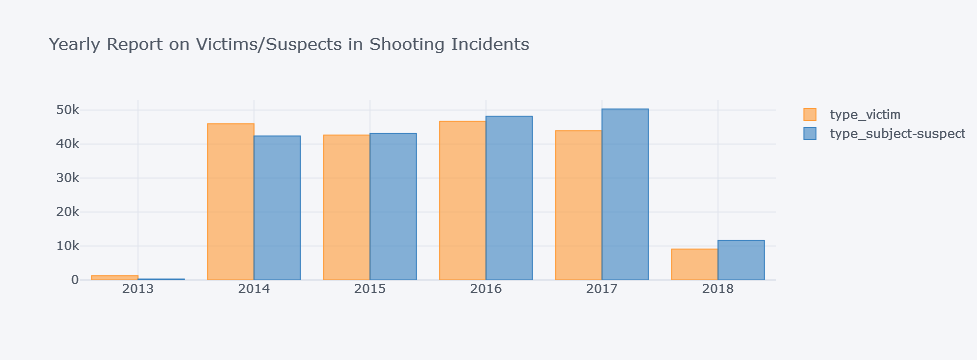

In [34]:
gun_df['participant_type'] = final_list_type
gun_df['type_victim'] = gun_df['participant_type'].apply(lambda x: x.count('Victim'))
gun_df['type_subject-suspect'] = gun_df['participant_type'].apply(lambda x: x.count('Subject-Suspect'))

victim_suspects_year = gun_df[['Year','type_victim','type_subject-suspect']].groupby(['Year'],as_index = False).sum()

victim_suspects_year[['Year','type_victim','type_subject-suspect']].set_index('Year').iplot(kind = 'bar',
                                        title= 'Yearly Report on Victims/Suspects in Shooting Incidents')

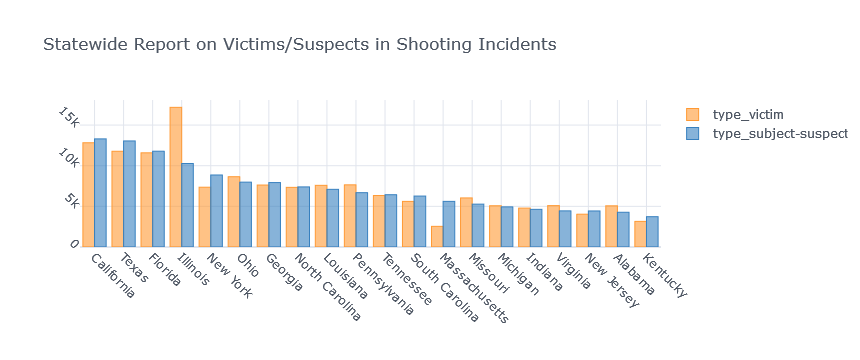

In [101]:
victim_suspects_state = gun_df[['state','type_victim','type_subject-suspect']].groupby(['state'],as_index = False).sum().sort_values(by='type_victim'and'type_subject-suspect',ascending = False)

victim_suspects_state.head(20)[['state','type_victim','type_subject-suspect']].set_index('state').iplot(kind='bar', theme = 'white', tickangle=45,
                                        title = 'Statewide Report on Victims/Suspects in Shooting Incidents')

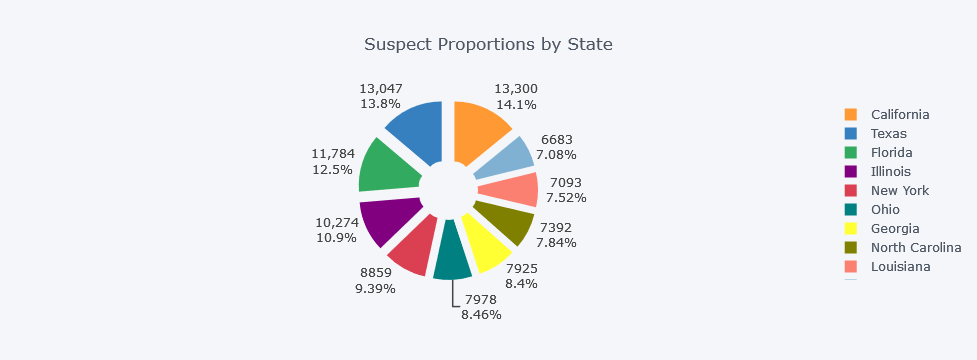

In [38]:
victim_suspects_state.head(10)[['state','type_victim','type_subject-suspect']].iplot(kind='pie',labels='state',values='type_subject-suspect',
                                    pull=.2,hole=0.2,textposition='outside',textinfo='value+percent',
                                        title = 'Suspect Proportions by State')

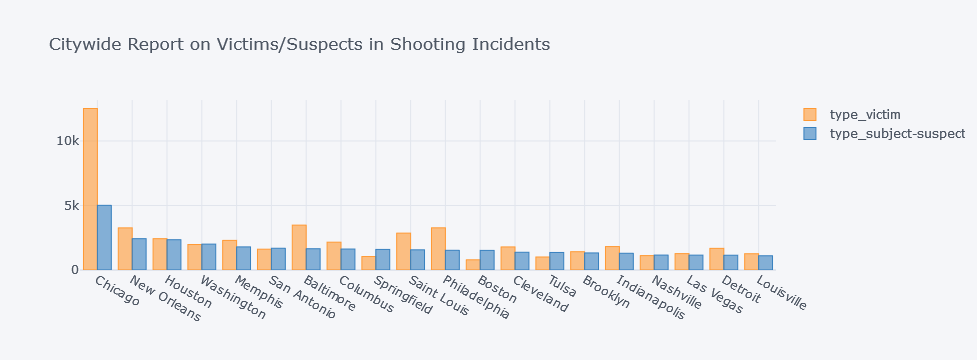

In [39]:
victim_suspects_city = gun_df[['city_or_county','type_victim','type_subject-suspect']].groupby(['city_or_county'],as_index = False).sum().sort_values(by='type_victim'and'type_subject-suspect',ascending = False)

victim_suspects_city.head(20)[['city_or_county','type_victim','type_subject-suspect']].set_index('city_or_county').iplot(kind='bar',
                                        title = 'Citywide Report on Victims/Suspects in Shooting Incidents')

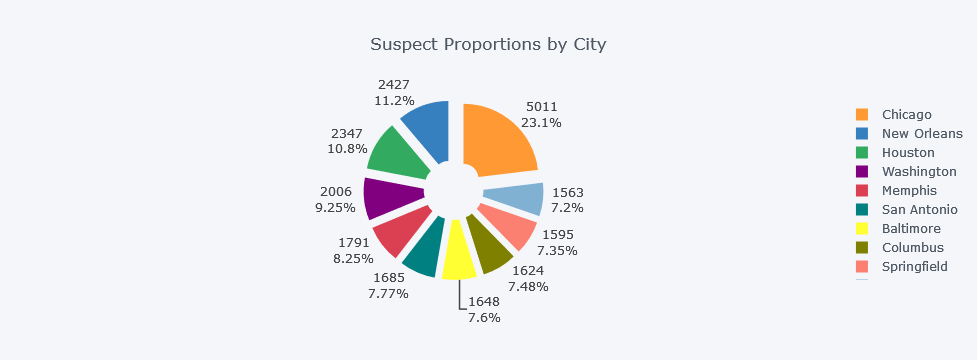

In [42]:
victim_suspects_city.head(10)[['city_or_county','type_victim','type_subject-suspect']].iplot(kind='pie',labels='city_or_county',values='type_subject-suspect',
                                    pull=0.2,hole=0.2,textposition='outside',textinfo='value+percent',
                                        title = 'Suspect Proportions by City')

In [45]:
gun_df['status_killed'] = gun_df['participant_status'].apply(lambda x: x.count('Killed'))
gun_df['status_Injured'] = gun_df['participant_status'].apply(lambda x: x.count('Injured'))
gun_df['status_Arrested'] = gun_df['participant_status'].apply(lambda x: x.count('Arrested'))
gun_df['status_Unharmed'] = gun_df['participant_status'].apply(lambda x: x.count('Unharmed'))

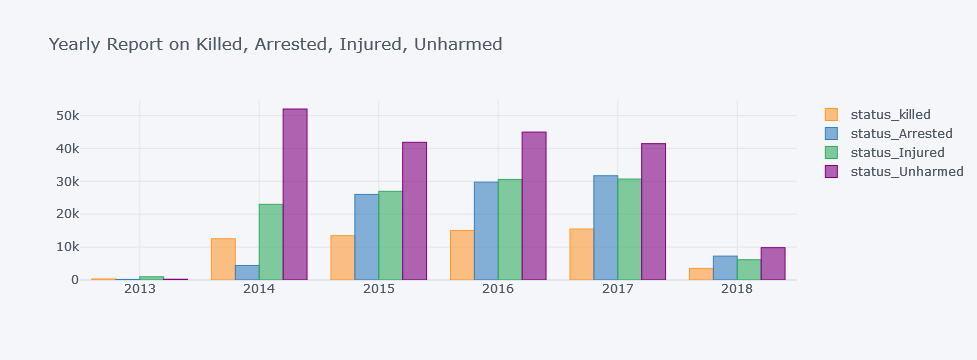

In [47]:
participant_status_year = gun_df[['Year','status_killed','status_Arrested','status_Injured','status_Unharmed']].groupby(['Year'],as_index = False).sum()

participant_status_year[['Year','status_killed','status_Arrested','status_Injured','status_Unharmed']].set_index('Year').iplot(kind='bar',
                                                            title = 'Yearly Report on Killed, Arrested, Injured, Unharmed')

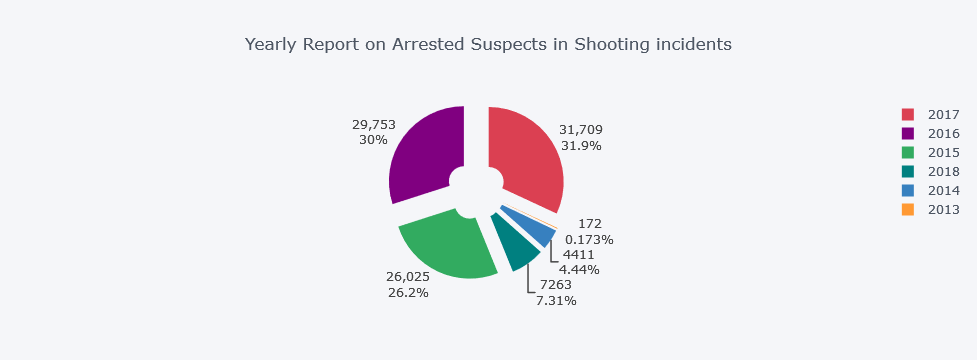

In [52]:
participant_status_year[['Year','status_killed','status_Arrested','status_Injured','status_Unharmed']].iplot(kind='pie',labels='Year',values='status_Arrested',
                                    pull=.2,hole=0.2,textposition='outside',textinfo='value+percent',
                                        title = 'Yearly Report on Arrested Suspects in Shooting incidents')

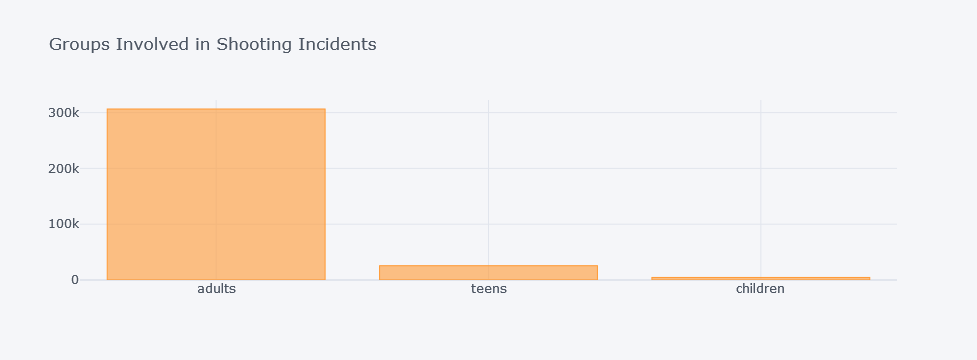

In [55]:
gun_df['adults'] = gun_df['participant_age_group'].apply(lambda x: x.count('Adult'))
gun_df['teens'] = gun_df['participant_age_group'].apply(lambda x: x.count('Teen'))
gun_df['children'] = gun_df['participant_age_group'].apply(lambda x: x.count('Child'))

gun_df[['adults','teens','children']].sum().iplot(kind= 'bar', 
                                    title = 'Groups Involved in Shooting Incidents')

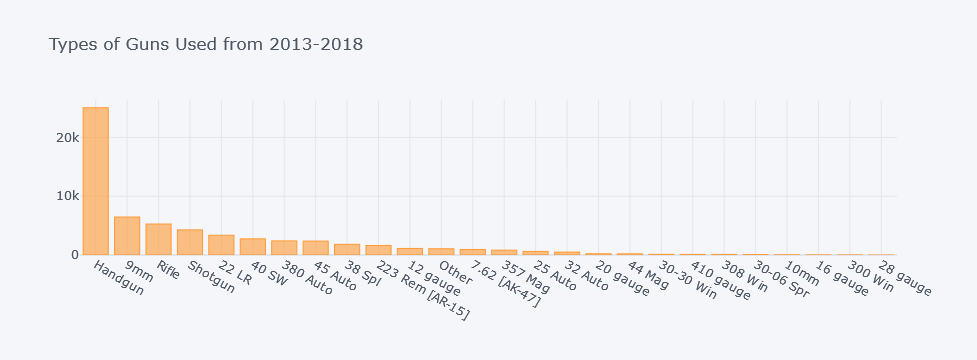

In [57]:
guns = gun_df['gun_type']
guns = guns.dropna()
guns = [x for x in guns if x != '0::Unknown' and x!='0:Unknown']

allguns=[]
for i in guns:
    result = re.sub("\d+::", "", i)
    result = re.sub("\d+:", "", result)
    result = result.split("|")
    for j in result:
        allguns.append(j)

allguns = [x for x in allguns if x != 'Unknown']
allguns = [x for x in allguns if x]

df_gtypes = pd.DataFrame()
df_gtypes['gun_types_clean'] = allguns

df_gtypes['gun_types_clean'].value_counts().iplot(kind='bar', title = 'Types of Guns Used from 2013-2018')

In [60]:
gun_df['gun_stolen'] = gun_df['gun_stolen'].fillna('Null')

gun_df['gun_stolen'] = gun_df['gun_stolen'].str.replace('::',',')
gun_df['gun_stolen'] = gun_df['gun_stolen'].str.replace('|',' ')
gun_df['gun_stolen'] = gun_df['gun_stolen'].str.replace(',',' ')
gun_df['gun_stolen'] = gun_df['gun_stolen'].str.replace('\d+', '')


gun_df['Stolenguns'] = gun_df['gun_stolen'].apply(lambda x: x.count('Stolen'))
gun_df['stolenguns'] = gun_df['gun_stolen'].apply(lambda x: x.count('stolen'))
gun_df['Stolengunstotal'] = gun_df['Stolenguns'] + gun_df['stolenguns']

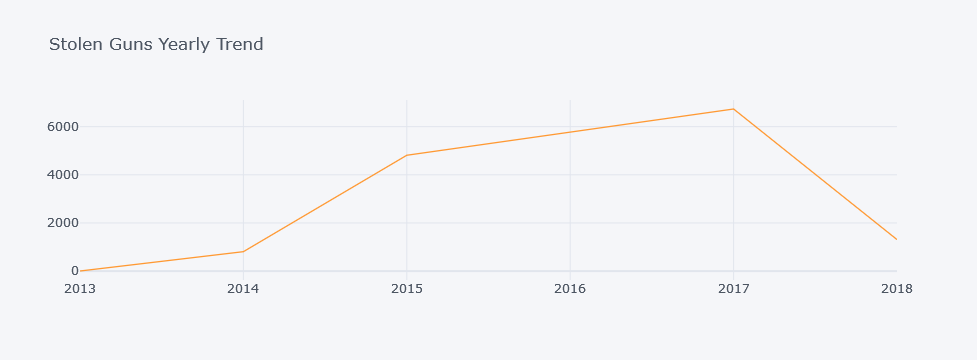

In [61]:
df_year_stolenguns = gun_df[['Year','Stolengunstotal']].groupby(['Year'], as_index = False).sum()
df_year_stolenguns[['Year','Stolengunstotal']].set_index('Year').iplot(kind = 'line',
                            title = 'Stolen Guns Yearly Trend')

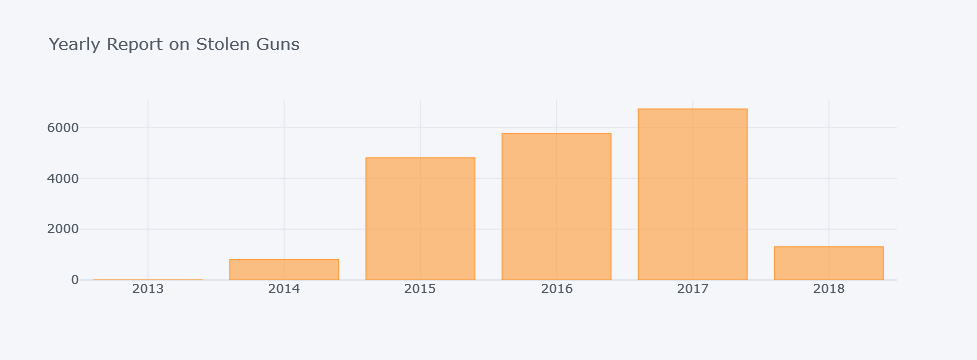

In [62]:
df_year_stolenguns[['Year','Stolengunstotal']].set_index('Year').iplot(kind = 'bar', title = 'Yearly Report on Stolen Guns')

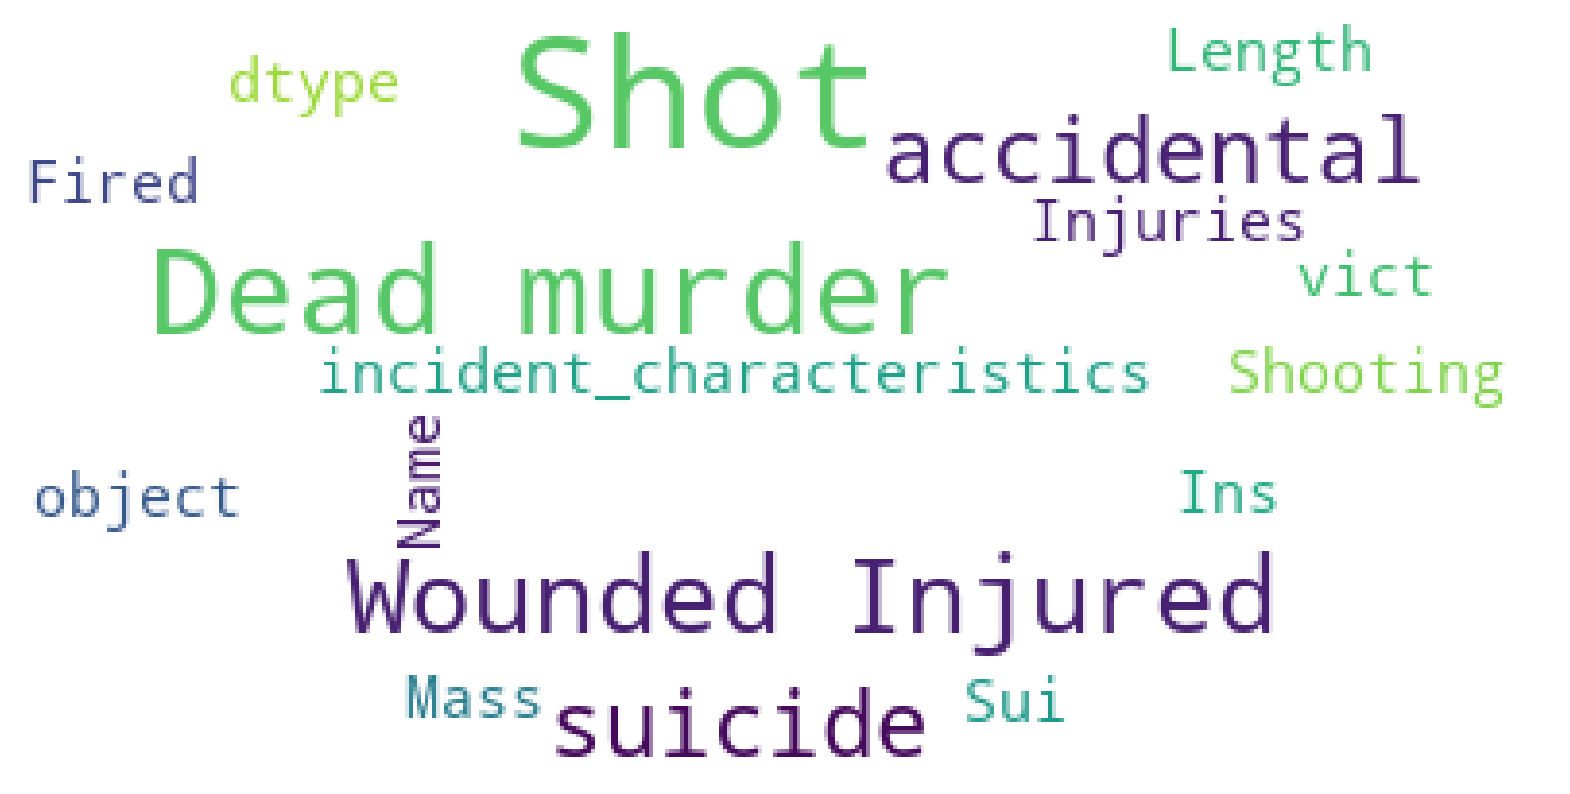

In [66]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import matplotlib as mpl

mpl.rcParams['figure.figsize']=(20,15)    
mpl.rcParams['font.size']=12                
mpl.rcParams['savefig.dpi']=100             
mpl.rcParams['figure.subplot.bottom']=.1 


stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='white',
                          stopwords=stopwords,
                          max_words=250,
                          max_font_size=40, 
                          random_state=42
                         ).generate(str(gun_df['incident_characteristics']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig("../mridul/image/word1.png", dpi=1100)

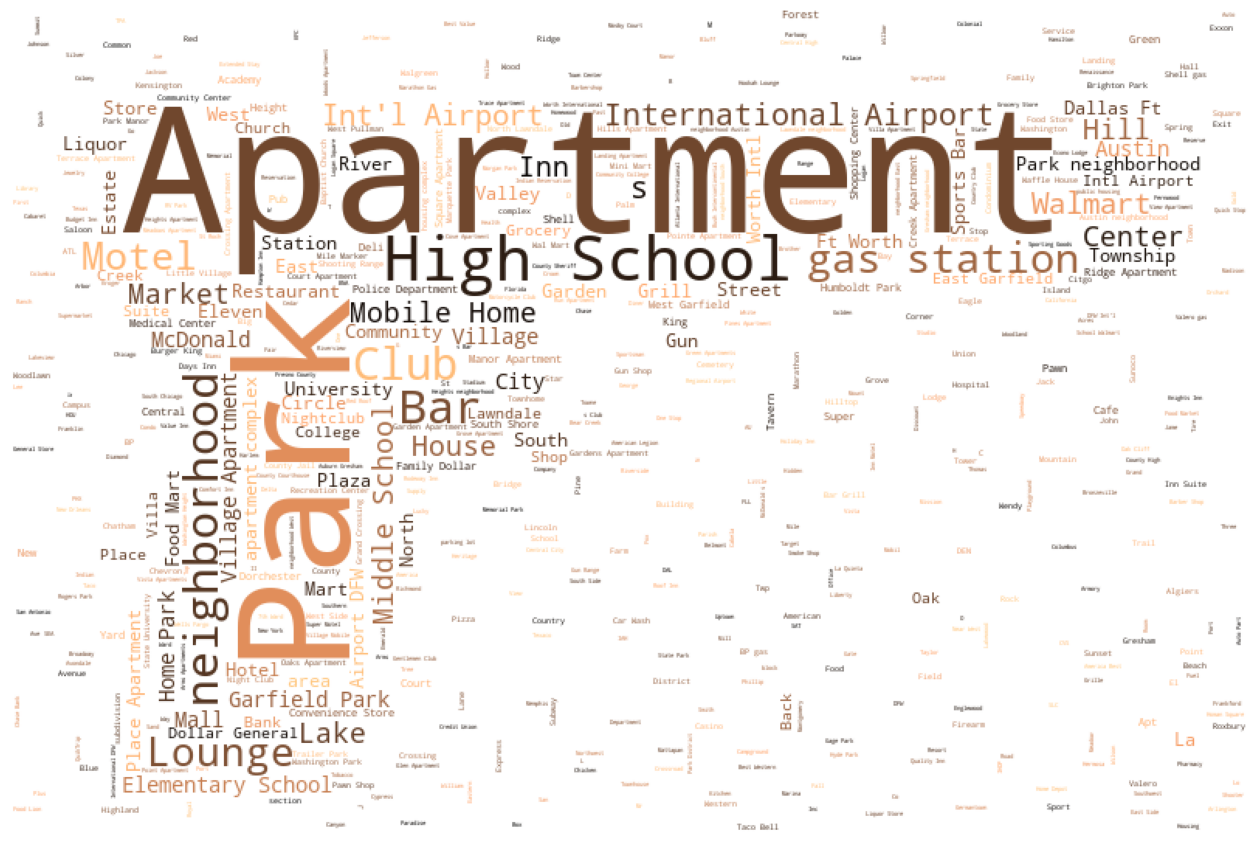

In [74]:
from PIL import Image 

mask = np.array(Image.open('../mridul/image/gun_flip.png'))
txt = " ".join(gun_df['location_description'].dropna())
wc = WordCloud(mask=mask, max_words=1200, stopwords=STOPWORDS, colormap='copper', background_color='White').generate(txt)
plt.figure(figsize=(16,18))
plt.imshow(wc)
plt.axis('off')
plt.title('')

# Save the word cloud as a PNG image
wc.to_file('../mridul/image/location.png')

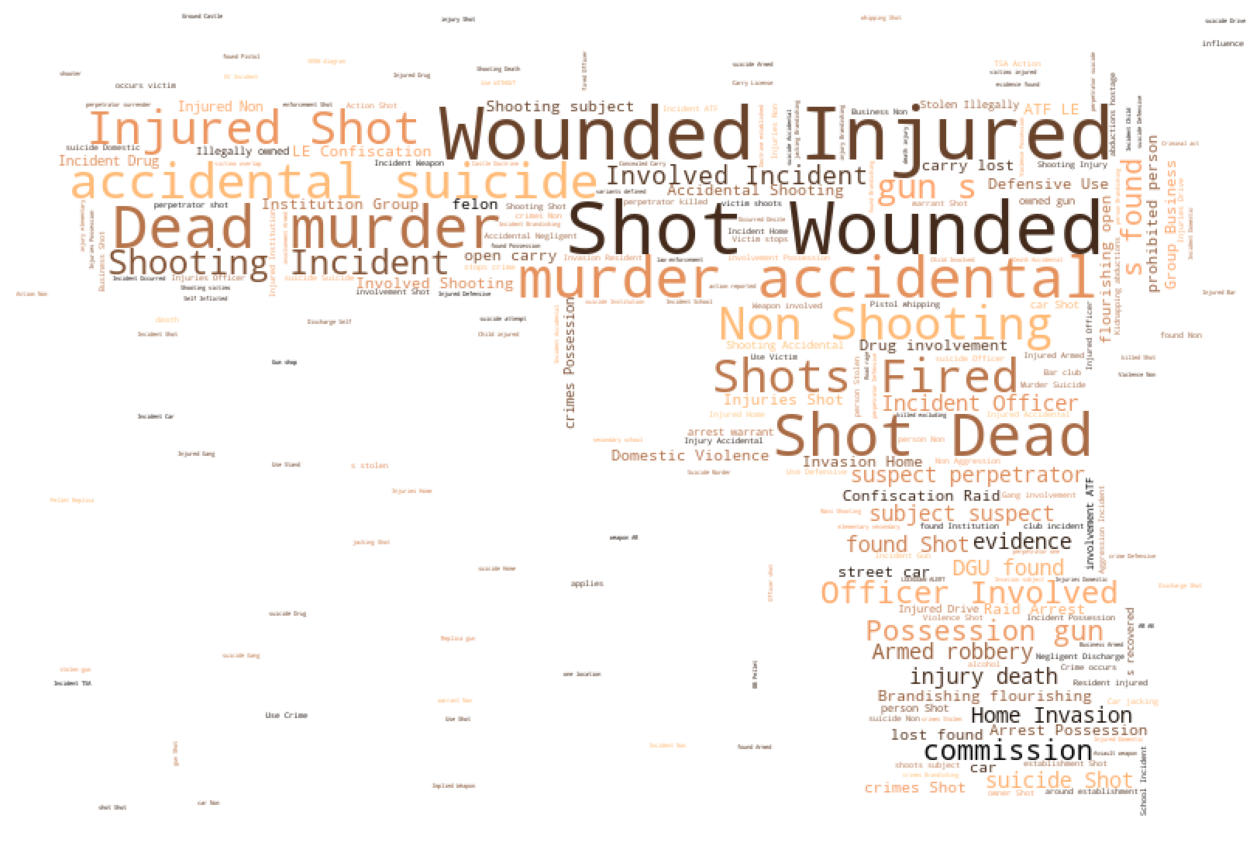

In [80]:
from PIL import Image 

mask = np.array(Image.open('../mridul/image/gun.png'))
txt = " ".join(gun_df['incident_characteristics'].dropna())
wc = WordCloud(mask=mask, max_words=1200, stopwords=STOPWORDS, colormap='copper', background_color='White').generate(txt)
plt.figure(figsize=(16,18))
plt.imshow(wc)
plt.axis('off')
plt.title('')

# Save the word cloud as a PNG image
wc.to_file('../mridul/image/incidents.png')